# Mini Project to identify Personal Loan Customers.

Bank is interested in converting its liability customers to asset customers by offering them personal loans.  
A campaign run the previsous year showed a conversin rate of 9%.  This year they are interested in increasing the conversion
rate by targeting high probaility customers.   This is a model to predict those customers that are highly likely to accept the 
personal loan offer.

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression   #for linear regression
import statsmodels.formula.api as smf 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [10]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]


In [11]:
df.head(2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [12]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observation on given data
Min experience is showing negative values, which is incorrect, so we have to clean that column 

## Data distribution chart

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


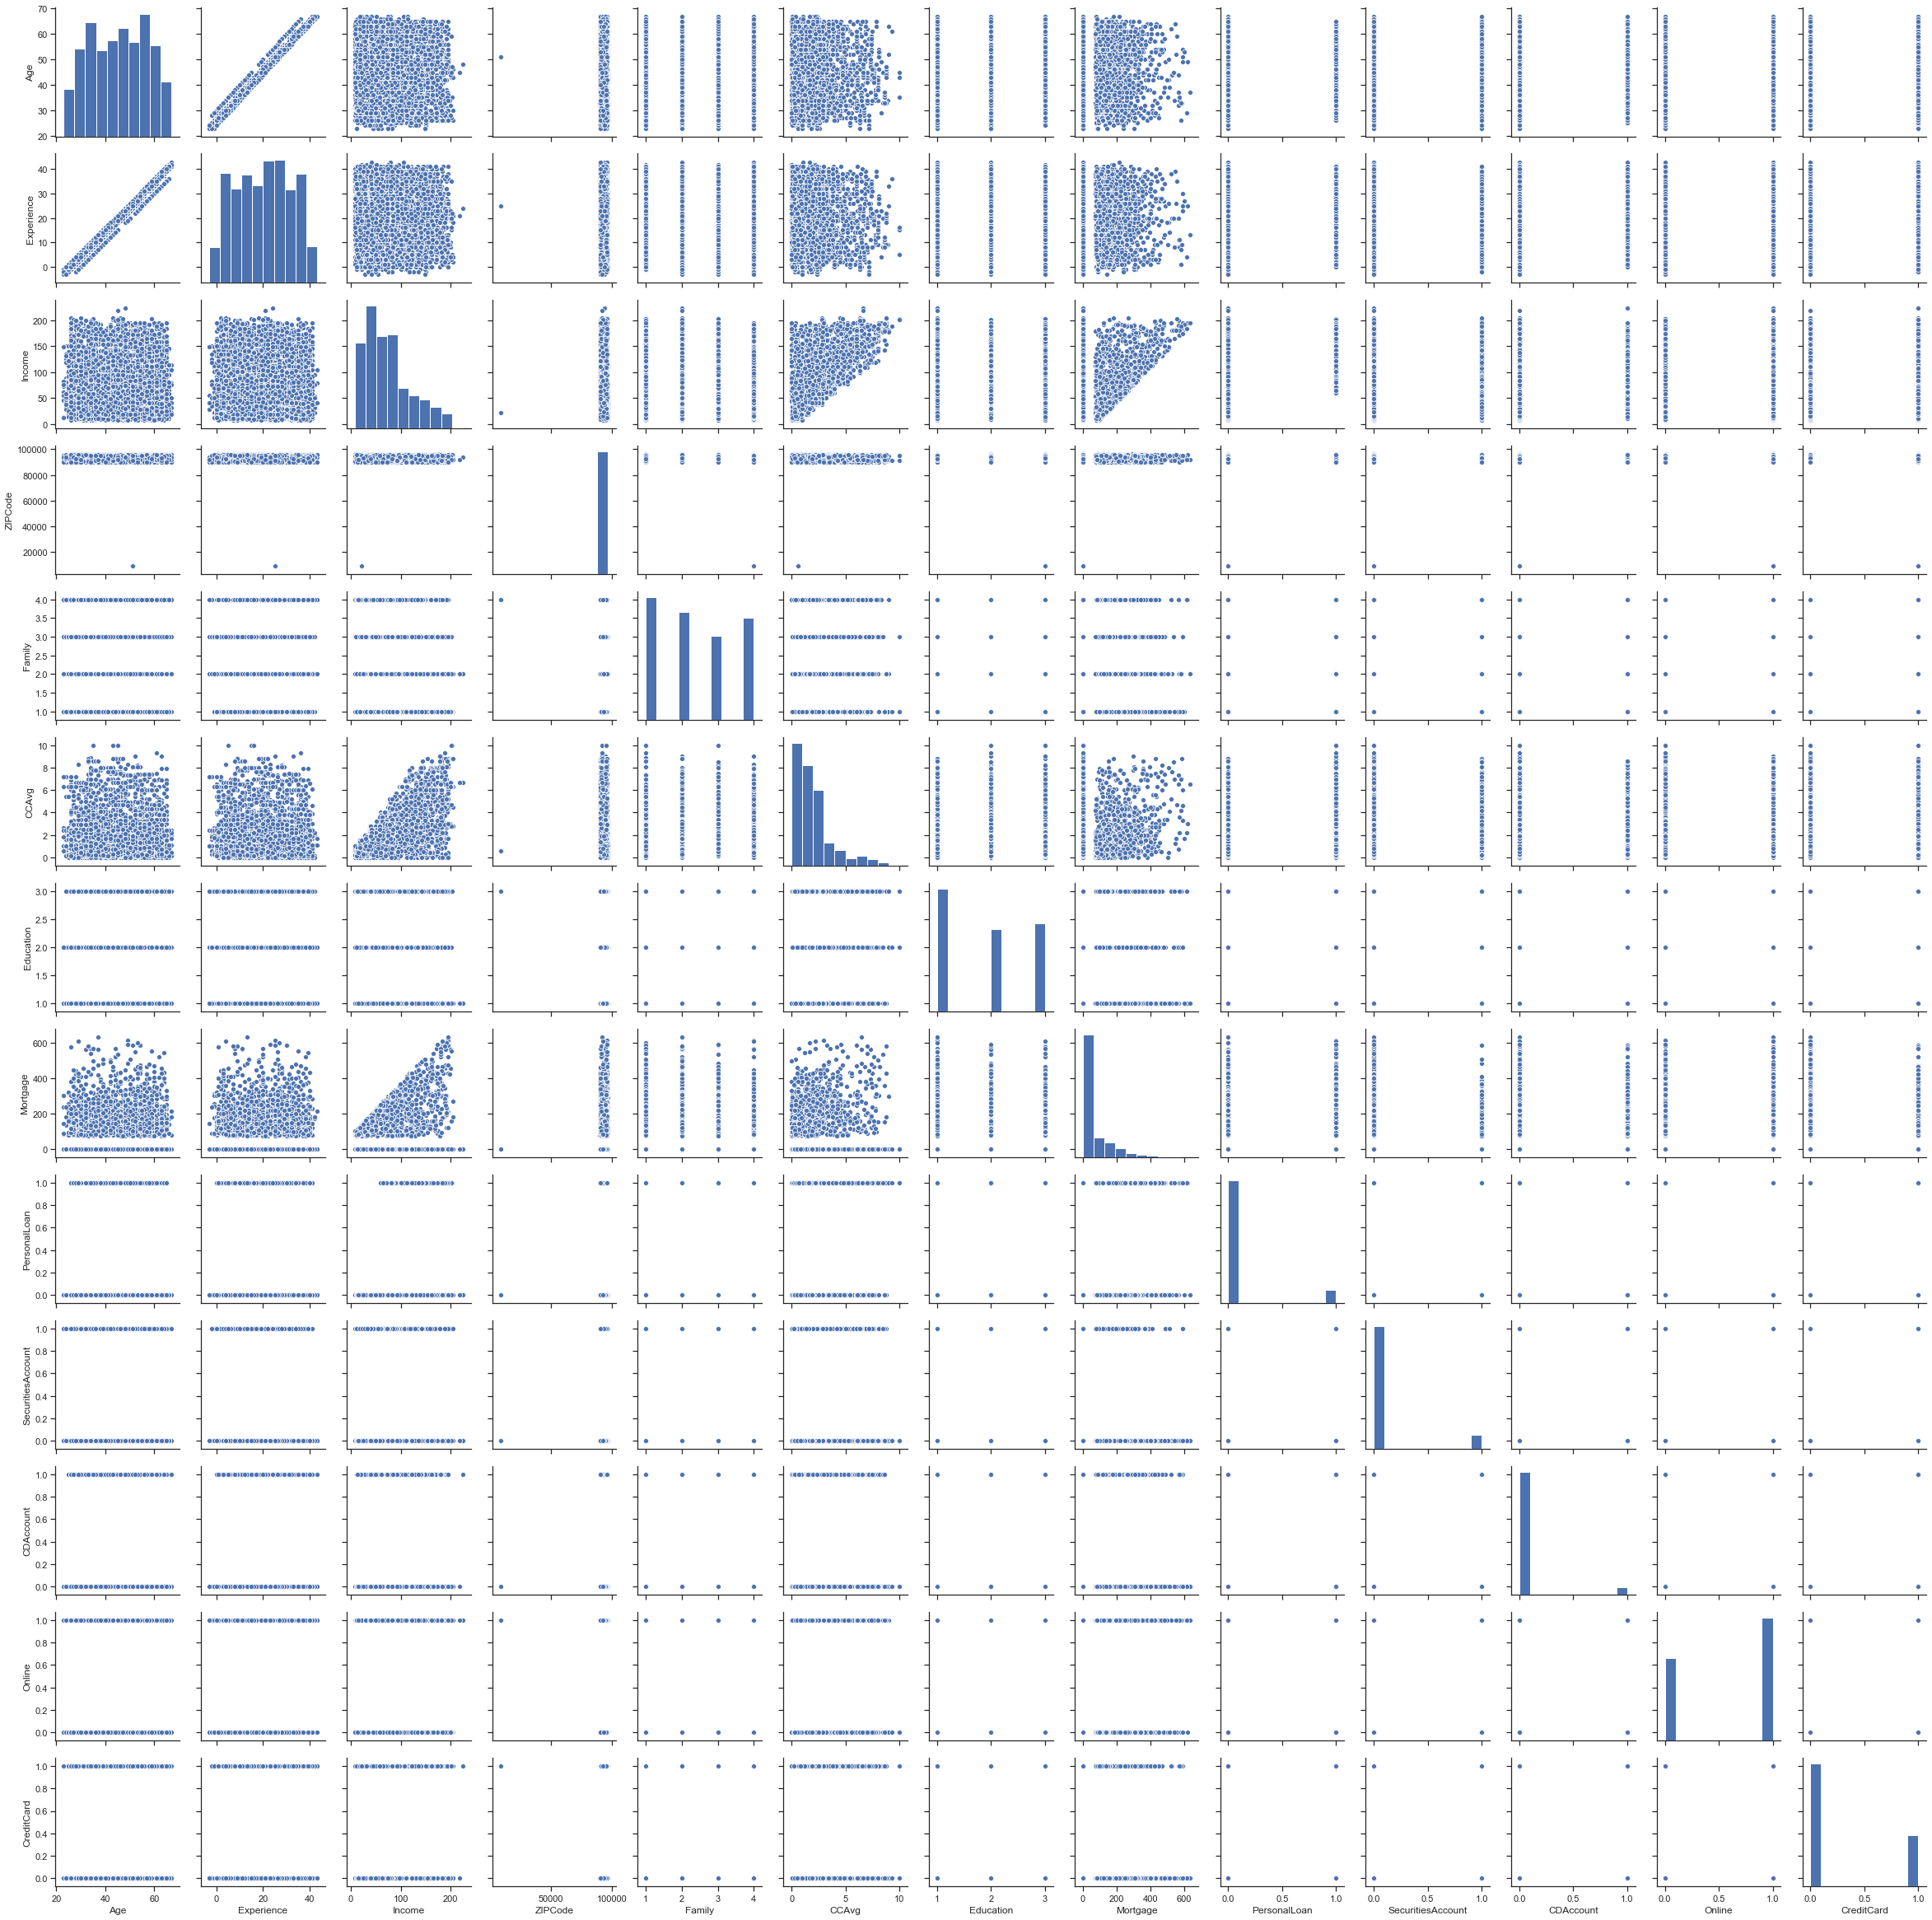

In [13]:
plt = sns.pairplot(df[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )
df.head(1)

AttributeError: 'PairGrid' object has no attribute 'tight_layout'

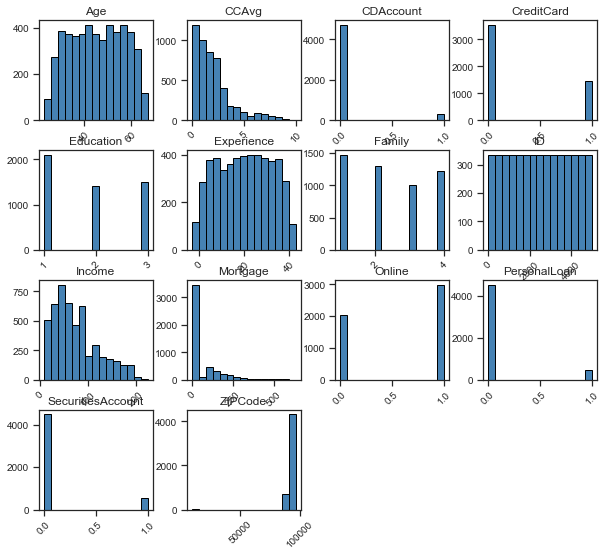

In [15]:
fig = df.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))  

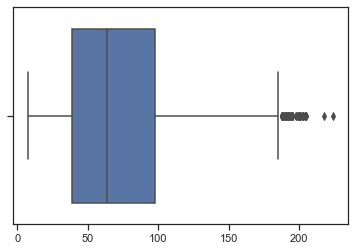

In [16]:
plt = sns.boxplot(df[['Income']])#,'Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

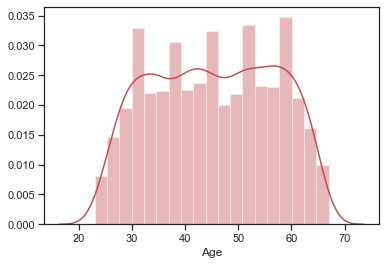

In [17]:
sns.distplot( df['Age'], color = 'r')

### Observation
Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.

## Negative Experience cleaning

In [18]:
dfposExp = df.loc[df['Experience'] >0]
mask = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[mask]['ID'].tolist()

In [19]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [20]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## what is the influence of Income level on whether a customer takes a personal loan across the education levels. 

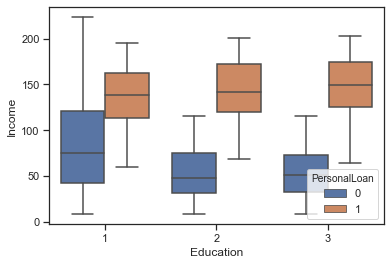

In [21]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=df)

### Observation 
The box plots show that those with education level 1 have higher incomes.  But customers who go for personal loans have the same income distribution regardless of the education level.

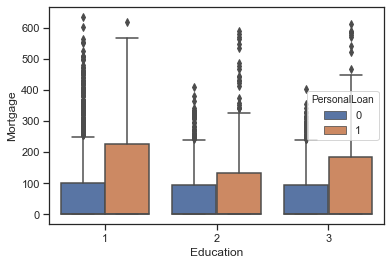

In [22]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df)

### Observation
Customers who taken loan also have higher mortgages.

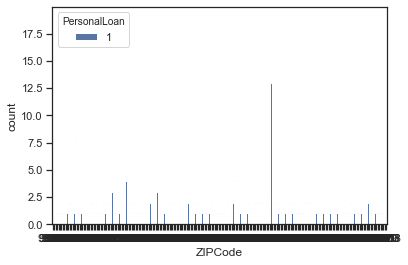

In [23]:
sns.countplot(x="ZIPCode", data=df[df.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [24]:
zipcode_top5 = df[df.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

### Observation
Top 5 locations who appled personal loan before 

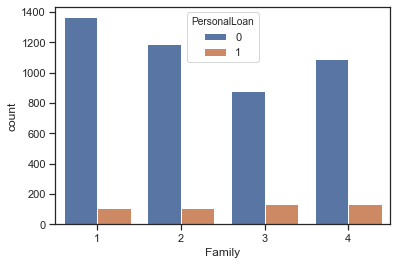

In [25]:
sns.countplot(x="Family", data=df,hue="PersonalLoan")

### Observations
### Does family size have any influence on whether a customer accepts a personal loan offer?

In [26]:
familysize_no = np.mean( df[df.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [27]:
familysize_yes = np.mean( df[df.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [28]:
from scipy import stats

stats.ttest_ind(df[df.PersonalLoan == 1]['Family'], df[df.PersonalLoan == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

### Observation 
Family size seems to have no impact on decision to take a loan.

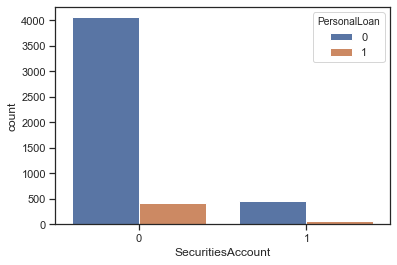

In [29]:
sns.countplot(x="SecuritiesAccount", data=df,hue="PersonalLoan")

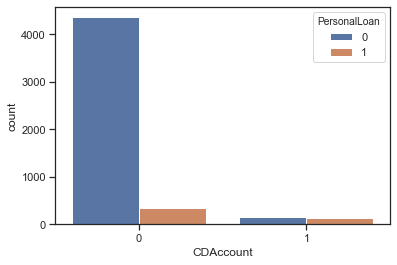

In [30]:
sns.countplot(x="CDAccount", data=df,hue="PersonalLoan")

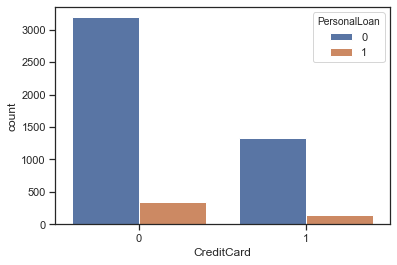

In [31]:
sns.countplot(x="CreditCard", data=df,hue="PersonalLoan")

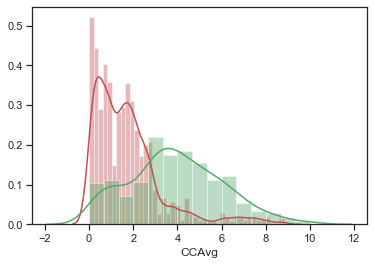

In [32]:
sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

### Observation
Customers who have taken personal loan have higher credit card average than those who did nottake.  So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

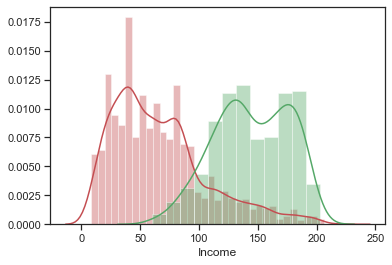

In [33]:
sns.distplot( df[df.PersonalLoan == 0]['Income'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Income'], color = 'g')

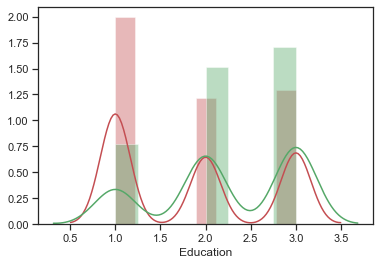

In [34]:
sns.distplot( df[df.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Education'], color = 'g')

## Correlation comparison with heat map

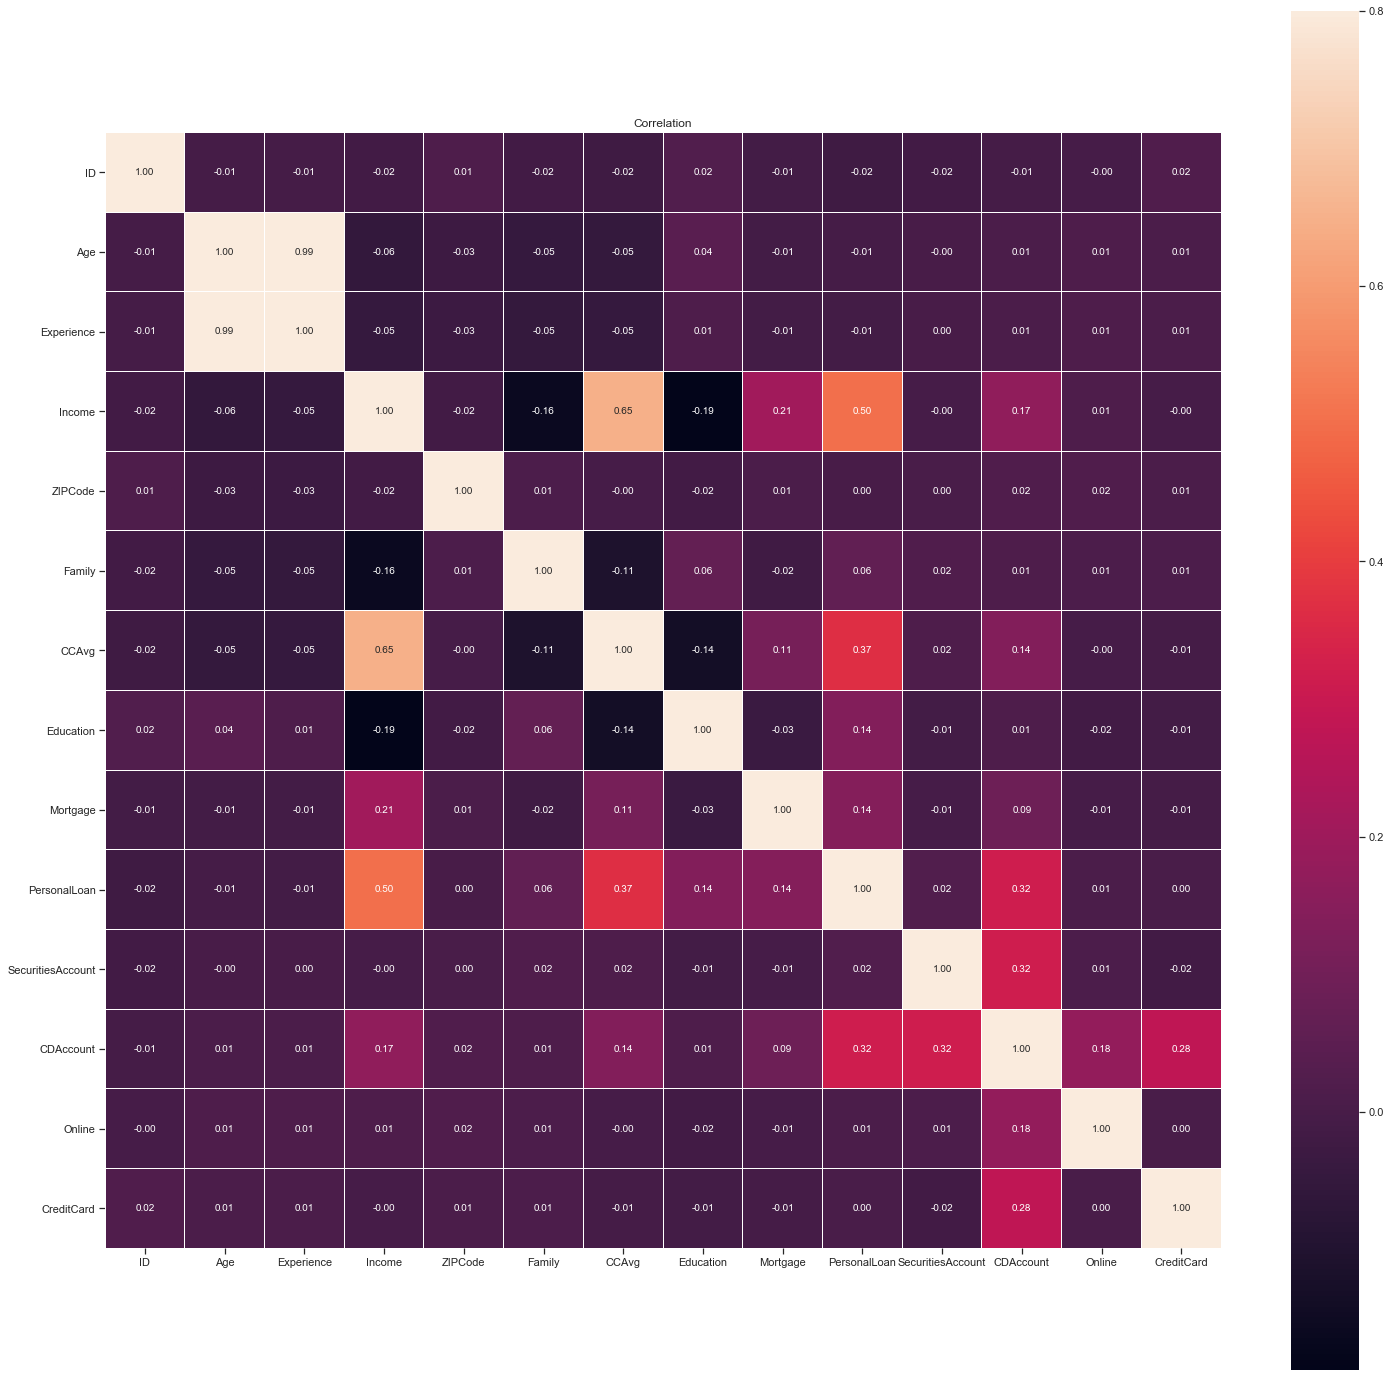

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Observation 
1. Age and  Experience is highly corelated
2. Income and CCAvg also corelated

### Splittin Data to Train And Test

In [38]:
X = df.drop(['PersonalLoan','ID','ZIPCode'], axis=1)
Y = df['PersonalLoan']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [39]:
X_Train_scaled = zscore(xtrain)
X_Test_scaled = zscore(xtest)

In [40]:
X_Train_scaled.shape

(3500, 11)

In [97]:
## Logistic Regression

In [61]:
model=LogisticRegression()

In [62]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
ypred=model.predict(xtest)

In [47]:
acc=metrics.accuracy_score(ytest,ypred)
acc

0.9453333333333334

In [48]:
metrics.confusion_matrix(ytest,ypred)

array([[1333,   18],
       [  64,   85]], dtype=int64)

In [49]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [58]:
#k fold
from sklearn import metrics
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X,Y):
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append((metrics.accuracy_score(Ytest,Y_predict)))
print(acc)

print("Cross_VAlidated_Accuracy_Score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))

[0.943011397720456, 0.9562087582483503, 0.9471788715486195]
Cross_VAlidated_Accuracy_Score: 0.949 (+/- 0.00005)


##  Naive Bayes

In [54]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [55]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# make predictions
expected = ytest
predicted = model.predict(xtest)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500

[[1228  123]
 [  65   84]]


## KNeighborsClassifier

In [11]:
NNH = KNeighborsClassifier(algorithm= 'auto',
 leaf_size= 10,
 metric= 'minkowski',
 n_neighbors= 5,
 weights='distance')
NNH.fit(X_Train_scaled, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [12]:
predicted_labels = NNH.predict(X_Test_scaled)

In [15]:
accuracy_score = metrics.accuracy_score(ytest, predicted_labels)
accuracy_score

0.9533333333333334

In [16]:
metrics.confusion_matrix(ytest,predicted_labels)

array([[1344,    7],
       [  63,   86]], dtype=int64)

In [17]:
print(metrics.classification_report(ytest,predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.92      0.58      0.71       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [74]:

#model Comparison
df1 = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df1.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
X=df1.drop(['PersonalLoan','Experience','ID'],axis=1)
y=df1.pop('PersonalLoan')


KNN: 0.912600 (0.008535)
CART: 0.950200 (0.006416)
NB: 0.883200 (0.011496)


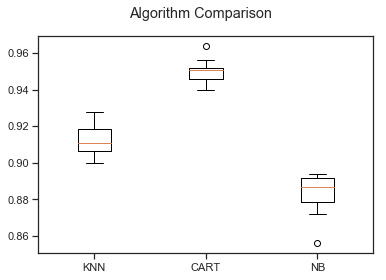

In [59]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [60]:
##Conclusion
##The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model